In [1]:
#Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
#Input Parameters
die_bias=(0.32,0.32,0.12,0.04,0.07,0.13)
# ladderDict={32:62, 42:68, 12:98}
# snakeDict={95:13 ,97:25, 93:37 ,79:27, 75:19,49:47 ,67:17}
slDict={32:62, 42:68, 12:98, 95:13 ,97:25, 93:37 ,79:27, 75:19, 49:47, 67:17}

In [3]:
def die_roll(bias):
    '''this function rolls 6 dimensional die with biasing provided'''
    return np.random.choice(range(1,7),p=bias)

#die_roll(die_bias)

In [4]:
#To run the game once for a specific configuration
def count_rolls(sl_dict,bias):
    curr_pos = 0
    rolls = 0
    while curr_pos <= 100:
        rolls += 1
        step = die_roll(die_bias)
        new_position = curr_pos + step
        if new_position == 100:
            break
        elif new_position > 100:
            new_position = curr_pos
        elif new_position in sl_dict.keys():
            new_position = sl_dict[new_position]
        curr_pos = new_position
    return rolls

# count_rolls(slDict,die_bias)

In [5]:
#Get number of rolls to reach 100
rolls_dist = []
for i in range (5000):
    rolls_dist.append(count_rolls(slDict, die_bias))

In [6]:
rolls_df = pd.DataFrame(data=rolls_dist,columns=['Rolls'])

(array([19., 78.,  0., ...,  0.,  0.,  1.]),
 array([3.0000000e+00, 3.6354000e+00, 4.2708000e+00, ..., 3.1787292e+03,
        3.1793646e+03, 3.1800000e+03]),
 <a list of 5000 Patch objects>)

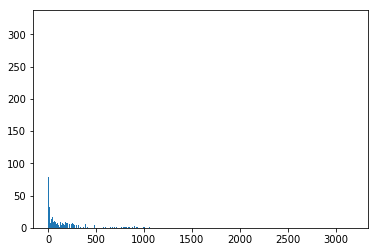

In [7]:
plt.hist(rolls_dist,bins=5000)

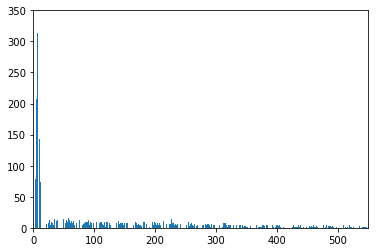

In [8]:
plt.hist(rolls_dist,bins=5000)
plt.axis([0,550,0,350])

plt.show()